In [158]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time 
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import os
import cred

In [159]:
#Create your spotify account and get your client id and client secret here
#https://developer.spotify.com/dashboard/applications
#create a file called cred.py in the same directory and include client_id and client_secret into the file:
            #client_id = 'yourClientID'
            #client_secret = 'YourClientSecret'



class PlayListDownloader:                
    client_id = cred.client_id
    client_secret = cred.client_secret
    client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    
    def __init__(self,outputName, user, playlistid: str):  
        self.outputName = outputName
        self.user = user
        self.playlist_id = playlistid
        id = ''
        self.ids = self.getTrackIDs()
        self.tracks = self.getTrackFeatures()
        self.df = self.createTrackList()
    
    def getTrackIDs(self):
        ids = []
        playlist = PlayListDownloader.sp.user_playlist(self.user, self.playlist_id)
        for item in playlist['tracks']['items']:
            track = item['track']
            ids.append(track['id'])
            PlayListDownloader.ids = ids
        return ids
        

    def getTrackFeatures(self):
        tracks = []
        ids = self.ids
        for id in ids:
            time.sleep(.5)
            meta = PlayListDownloader.sp.track(id)
            features = PlayListDownloader.sp.audio_features(id)
            
            # metadata
            #more information: https://developer.spotify.com/documentation/web-api/reference/tracks/get-track/
            name = meta['name']
            album = meta['album']['name']
            artist = meta['album']['artists'][0]['name']
            release_date = meta['album']['release_date']
            length = meta['duration_ms']
            popularity = meta['popularity']

            # features of the music
            #more information: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/
            acousticness = features[0]['acousticness']
            danceability = features[0]['danceability']
            energy = features[0]['energy']
            instrumentalness = features[0]['instrumentalness']
            liveness = features[0]['liveness']
            loudness = features[0]['loudness']
            speechiness = features[0]['speechiness']
            tempo = features[0]['tempo']
            time_signature = features[0]['time_signature']
            valence = features[0]['valence']

            track = [name, album, artist, release_date, length, popularity,acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature,valence]
            tracks.append(track)
        
        return tracks
    
            

    def createTrackList(self):
        # create dataset
        df = pd.DataFrame(self.tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature','valence'])
        #Creating csv file from the dataFrame
        fileName = "spotify_{0}".format(self.outputName)
        df.to_csv("../data/"+fileName+".csv", sep = ',')
        return df
    
    def heatMap(self):
        self.corr = self.df[['popularity','acousticness','danceability','energy','instrumentalness','liveness','tempo','valence']].corr()
        mask = np.zeros_like(self.corr, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        sns.set(style='darkgrid')
        plt.figure(figsize=(12,8))
        ax = sns.heatmap(self.corr, annot=True, mask=mask)
        ax.collections[0].colorbar.set_label("Playlist heatmap")
        return ax
    
    @classmethod
    def changeCred(cls, client_id, client_secret):
        cls.client_id = client_id
        cls.client_secret = client_secret
        cls.client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
        cls.sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
        

        

<h2>Infortmation about the Playlist</h2>
<ul>Playlist
    <li> pl1 : Top 50 Global</li>
 </ul>

In [161]:
#to make an instance, include these parameters: 'your outputfilename (It's recommended to use 
#the same name of your instance), spotify account username, playlist id'
pl1 = PlayListDownloader('PL1','adityaiqbal', '37i9dQZEVXbMDoHDwVN2tF')



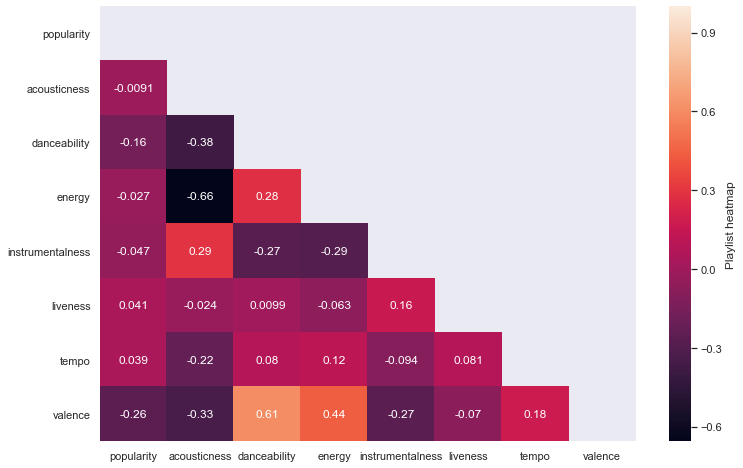

In [162]:
pl1.heatMap()

In [103]:
pl1.df.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,Savage Love (Laxed - Siren Beat),Savage Love (Laxed - Siren Beat),Jawsh 685,2020-06-11,171374,96,0.23400,0.767,0.481,0.000000,0.2690,-8.520,0.0803,150.076,4,0.7610
1,ROCKSTAR (feat. Roddy Ricch),BLAME IT ON BABY,DaBaby,2020-04-17,181733,100,0.24700,0.746,0.690,0.000000,0.1010,-7.956,0.1640,89.977,4,0.4970
2,Blinding Lights,After Hours,The Weeknd,2020-03-20,200040,99,0.00146,0.514,0.730,0.000095,0.0897,-5.934,0.0598,171.005,4,0.3340
3,Watermelon Sugar,Fine Line,Harry Styles,2019-12-13,174000,96,0.12200,0.548,0.816,0.000000,0.3350,-4.209,0.0465,95.390,4,0.5570
4,my future,my future,Billie Eilish,2020-07-30,208155,83,0.79500,0.444,0.309,0.132000,0.3520,-10.956,0.0620,104.745,4,0.0875


<h4>Correlation heat map

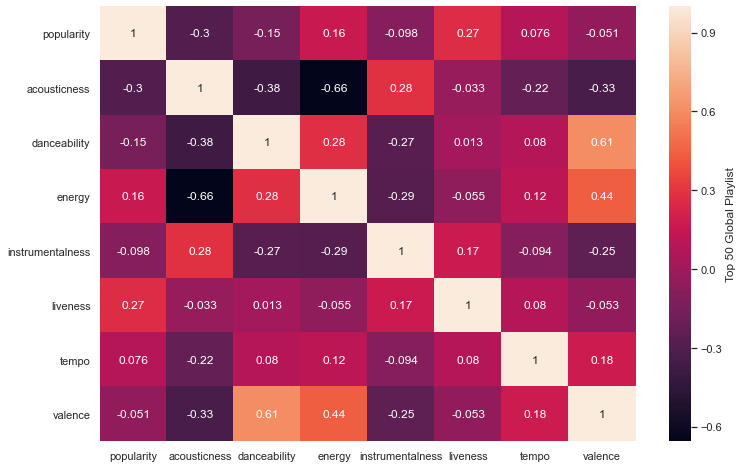

In [126]:
pl1.corr = pl1.df[['popularity','acousticness','danceability','energy','instrumentalness','liveness','tempo','valence']].corr()

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
ax = sns.heatmap(pl1.corr, annot=True)
ax.collections[0].colorbar.set_label("Top 50 Global Playlist")

In [105]:
pl1.df[['artist','energy','acousticness','popularity']].groupby('artist').mean().sort_values(by='energy', ascending=False)[:10]

,energy,acousticness,popularity
artist,,,
Joel Corry,0.874,0.16800,87.0
Lady Gaga,0.855,0.02100,87.0
Harry Styles,0.816,0.12200,96.0
Ozuna,0.806,0.05310,92.0
BLACKPINK,0.782,0.06940,89.0
Surf Mesa,0.774,0.06860,94.0
Dua Lipa,0.761,0.08965,88.5
The Weeknd,0.730,0.00146,99.0
SAINt JHN,0.724,0.01670,95.0


In [106]:
pl1.df.acousticness.mean()


0.27154059999999997

In [163]:


pl2 = PlayListDownloader('PL2','adityaiqbal', '7g2KyiE9RI5F1fV60OIUu4')

In [108]:
pl2.df.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,Of Dreams To Come,In My Element,Robert Glasper,2007-01-01,491466,29,0.892,0.436,0.432,0.822,0.119,-16.085,0.0543,111.638,3,0.133
1,Basin Street Blues,The Cat,Jimmy Smith,1998-01-01,239133,0,0.836,0.452,0.445,0.806,0.175,-13.832,0.0378,140.496,1,0.714
2,Makin' Whoopee - Take 1,Louis Armstrong - Ambassador Of Jazz,Louis Armstrong,2011-01-01,272533,0,0.775,0.591,0.196,0.000,0.541,-16.486,0.1120,73.489,4,0.416
3,Birks' Works,Verve Jazz Masters 10: Dizzy Gillespie,Dizzy Gillespie,1994,297493,0,0.692,0.506,0.443,0.710,0.234,-9.237,0.0606,133.845,4,0.626
4,Time After Time,The Definitive John Coltrane On Prestige And R...,John Coltrane,2010-01-01,465106,0,0.947,0.555,0.237,0.602,0.145,-10.224,0.0388,91.553,4,0.338


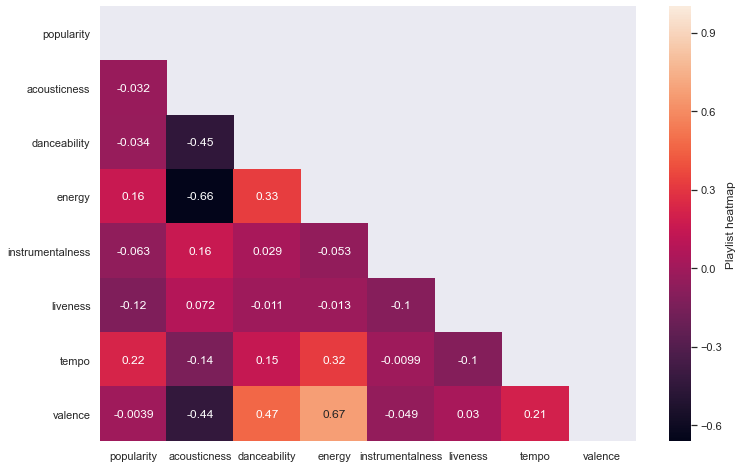

In [164]:
pl2.heatMap()

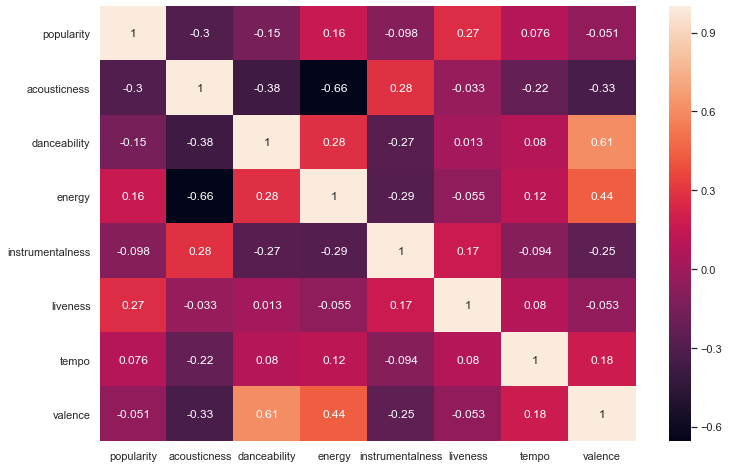

In [114]:
pl2.corr = pl1.df[['popularity','acousticness','danceability','energy','instrumentalness','liveness','tempo','valence']].corr()

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
sns.heatmap(pl2.corr, annot=True)

<h2>Sad and Happy Music

In [115]:
pl3 = PlayListDownloader('PL2','adityaiqbal', '7ABD15iASBIpPP5uJ5awvq') #sad music

In [116]:
pl4 = PlayListDownloader('PL2','adityaiqbal', '37i9dQZF1DWUAZoWydCivZ') #positive vibes


In [129]:
for i in range(len(pl3.df)):
    pl3.df['sad'] = 1
for i in range(len(pl4.df)):
    pl4.df['sad'] = 0

In [130]:
pl3.df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,sad
0,The A Team,The A Team,Ed Sheeran,2011-05-01,258588,34,0.6780,0.626,0.286,0.000000,0.134,-9.933,0.0374,84.954,4,0.3660,1
1,Breathe Me,Colour The Small One,Sia,2004-01-01,272800,68,0.0364,0.552,0.643,0.740000,0.105,-7.360,0.0327,120.012,4,0.2120,1
2,Falling,Fine Line,Harry Styles,2019-12-13,240133,86,0.8390,0.567,0.267,0.000001,0.089,-6.502,0.0299,110.011,4,0.0592,1
3,Skinny Love,"For Emma, Forever Ago",Bon Iver,2008-05-12,238532,67,0.8420,0.592,0.256,0.000002,0.088,-14.031,0.0449,76.361,4,0.1030,1
4,Youth,The Wild Youth EP,Daughter,2012-02-29,251626,0,0.6100,0.588,0.477,0.001880,0.122,-12.710,0.0492,150.396,4,0.4880,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Conversation,Conversation,Lucy Rose,2019-01-10,229560,45,0.9010,0.242,0.137,0.010500,0.167,-16.332,0.0322,92.454,3,0.0644,1
96,The Good in Goodbye (Alternate Version),The Good in Goodbye (Alternate Version),Alexander Wren,2019-10-25,249576,40,0.5900,0.709,0.299,0.002920,0.111,-9.001,0.0297,112.984,3,0.4230,1
97,Such Great Heights,Around The Well,Iron & Wine,2009-05-19,251280,0,0.8080,0.610,0.275,0.913000,0.403,-10.644,0.0280,94.088,4,0.5520,1
98,Recording 15,Living Water,Shannon Lay,2017-09-22,242000,60,0.9560,0.552,0.126,0.015300,0.109,-18.014,0.0306,92.441,4,0.4390,1


In [131]:
pl4.df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,sad
0,Mama,Blue,Jonas Blue,2018-11-09,184133,73,0.10100,0.738,0.794,0.000000,0.0533,-4.118,0.0416,104.014,4,0.566,0
1,Flames,7,David Guetta,2018-09-14,194680,64,0.08170,0.631,0.649,0.000004,0.0934,-5.892,0.0385,93.950,4,0.421,0
2,One Kiss (with Dua Lipa),One Kiss (with Dua Lipa),Calvin Harris,2018-04-06,214846,84,0.03700,0.791,0.862,0.000022,0.0814,-3.240,0.1100,123.994,4,0.592,0
3,Clarity,Clarity,Zedd,2012-01-01,271426,74,0.03980,0.509,0.781,0.000000,0.0749,-3.480,0.0720,128.000,4,0.176,0
4,Middle,Encore,DJ Snake,2016-08-05,220573,75,0.01410,0.583,0.695,0.000000,0.0527,-5.336,0.0423,104.879,4,0.224,0
5,Roses (feat. ROZES),Roses (feat. ROZES),The Chainsmokers,2015-06-16,226738,73,0.04350,0.713,0.802,0.003770,0.3090,-7.055,0.0561,100.001,4,0.343,0
6,One Dance,Views,Drake,2016-05-06,173986,81,0.00776,0.792,0.625,0.001800,0.3290,-5.609,0.0536,103.967,4,0.370,0
7,Starboy,Starboy,The Weeknd,2016-11-25,230453,84,0.14100,0.679,0.587,0.000006,0.1370,-7.015,0.2760,186.003,4,0.486,0
8,Cake By The Ocean,DNCE,DNCE,2016-11-18,219146,80,0.15200,0.774,0.753,0.000000,0.0371,-5.446,0.0517,119.002,4,0.896,0
9,Fast Car,Blue,Jonas Blue,2018-11-09,212424,74,0.46900,0.672,0.578,0.000000,0.3120,-6.621,0.0569,113.945,4,0.548,0


<h3>Find the mean of all the music features for each playlist. Compare it.

In [118]:
pl3.df[['name','artist','energy','acousticness']].sort_values(by='energy')

,name,artist,energy,acousticness
55,Trying My Best,Anson Seabra,0.0587,0.9500
94,Sinking Man - The Walking Dead Soundtrack,Various Artists,0.0646,0.9050
59,Slow It Down,The Lumineers,0.0657,0.9280
92,you were good to me,Jeremy Zucker,0.0848,0.9130
18,"Murder Song (5, 4, 3, 2, 1) - Acoustic",AURORA,0.0887,0.9020
...,...,...,...,...
21,Love Is A Losing Game,Amy Winehouse,0.5610,0.3170
20,Before You Go,Lewis Capaldi,0.5750,0.6040
60,Last Time,Johnning,0.5870,0.1110
1,Breathe Me,Sia,0.6430,0.0364


In [119]:
pl3.df['danceability'].mean()

0.5136799999999997

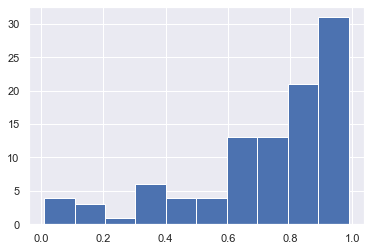

In [123]:
x = pl3.df['acousticness'].values
plt.hist(x, bins = 10)
plt.show()

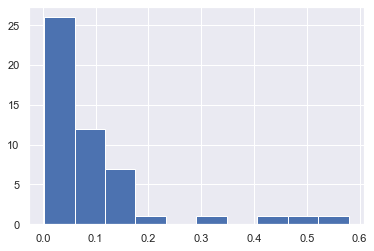

In [124]:
y = pl4.df['acousticness'].values
plt.hist(y, bins = 10)
plt.show()

In [ ]:
pl1.corr = pl1.df[['popularity','acousticness','danceability','energy','instrumentalness','liveness','tempo','valence']].corr()
mask = np.zeros_like(pl1.corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
ax = sns.heatmap(pl1.corr, annot=True, mask=mask)
ax.collections[0].colorbar.set_label("Top 50 Global Playlist")

Determine if song is happy or sad based on the playlist (1 or 0)